In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),\
(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')
x_test=xtest.reshape(xtest.shape[0],28,28,1).astype('float32')

In [ ]:
x_train_normal=x_train/255
x_test_normal=x_test/255

In [ ]:
y_train=np_utils.to_categorical(ytrain)
y_test=np_utils.to_categorical(ytest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Conv2DTranspose

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

SyntaxError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
training=model.fit(x_train_normal, x_train_normal,
                epochs=25,
                batch_size=1000,
                validation_split=0.2)

Epoch 1/25
48/48 [==============================] - 5s 102ms/step - loss: 0.2481 - val_loss: 0.0873
Epoch 2/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0767 - val_loss: 0.0721
Epoch 3/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0695 - val_loss: 0.0683
Epoch 4/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0667 - val_loss: 0.0663
Epoch 5/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0652 - val_loss: 0.0649
Epoch 6/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0641 - val_loss: 0.0641
Epoch 7/25
48/48 [==============================] - 5s 98ms/step - loss: 0.0634 - val_loss: 0.0636
Epoch 8/25
48/48 [==============================] - 5s 99ms/step - loss: 0.0630 - val_loss: 0.0631
Epoch 9/25
48/48 [==============================] - 5s 99ms/step - loss: 0.0627 - val_loss: 0.0629
Epoch 10/25
48/48 [==============================] - 5s 99ms/step - loss: 0.0623 - val_loss: 0.0626
Epoch 11

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

In [ ]:
def plot_image_label_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()    

In [ ]:
def show_training(training,train,validation):
    plt.plot(training.history[train])
    plt.plot(training.history[validation])
    plt.title('training process')
    plt.ylabel('training measure')
    plt.xlabel('Epoch')
    plt.legend(['training','validation'],loc='upper left')
    plt.show()

In [ ]:
restruct_imgs = model.predict(x_train_normal)

In [ ]:
restruct_imgs.shape

(60000, 28, 28, 1)

In [ ]:
restruct_imgs=restruct_imgs*255

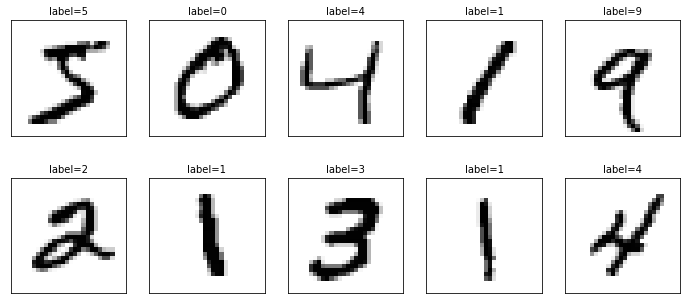

In [ ]:
plot_image_label_prediction(xtrain,ytrain,[],0,10)

In [ ]:
restruct_imgs=restruct_imgs.reshape(60000,28,28)

In [ ]:
restruct_imgs.shape

(60000, 28, 28)

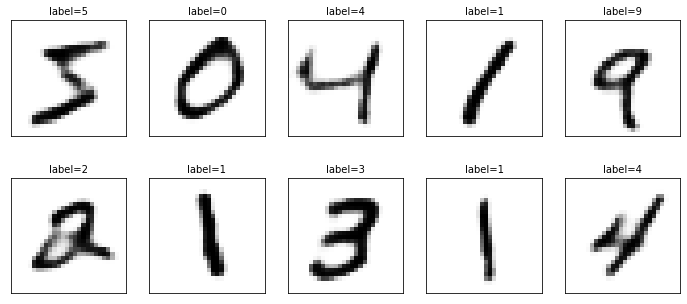

In [ ]:
plot_image_label_prediction(restruct_imgs,ytrain,[],0,10)